### Introduction to NLP and Transformers: Building a News Sentiment Classifier

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Flatten, SimpleRNN
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

### Keras and Text

In [2]:
sents = ['This is the first', 'this is the second']

In [3]:
#instantiate the tokenizer


In [4]:
#fit on texts


In [5]:
#create sequences based on fit


In [6]:
#print sentences


In [7]:
#one hot encode with to_matrix


In [8]:
#examine the word_index


### A Basic Neural Network Approach

In [13]:
news = pd.read_csv('../data/all-data.csv', encoding = 'latin-1', header = None)

In [14]:
news.columns = ['sentiment', 'headline']

In [15]:
news.head()

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [53]:
tokenizer = Tokenizer(num_words = 1000)

In [56]:
tokenizer.fit_on_texts(news['headline'].values)

In [58]:
dtm = tokenizer.texts_to_matrix(news['headline'].values)

In [69]:
model = Sequential()
model.add(Dense(32, input_shape = (1000,)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(dtm, y)

In [71]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8254 - acc: 0.6549 - val_loss: 0.7212 - val_acc: 0.7079
Epoch 2/10
114/114 [==============================] - 0s 909us/step - loss: 0.6213 - acc: 0.7532 - val_loss: 0.6295 - val_acc: 0.7483
Epoch 3/10
114/114 [==============================] - 0s 901us/step - loss: 0.5261 - acc: 0.7986 - val_loss: 0.5931 - val_acc: 0.7624
Epoch 4/10
114/114 [==============================] - 0s 889us/step - loss: 0.4699 - acc: 0.8198 - val_loss: 0.5934 - val_acc: 0.7640
Epoch 5/10
114/114 [==============================] - 0s 884us/step - loss: 0.4376 - acc: 0.8335 - val_loss: 0.5838 - val_acc: 0.7682
Epoch 6/10
114/114 [==============================] - 0s 976us/step - loss: 0.4127 - acc: 0.8445 - val_loss: 0.5898 - val_acc: 0.7657
Epoch 7/10
114/114 [==============================] - 0s 895us/step - loss: 0.3948 - acc: 0.8451 - val_loss: 0.6037 - val_acc: 0.7673
Epoch 8/10
114/114 [==============================] - 0s 885us/s

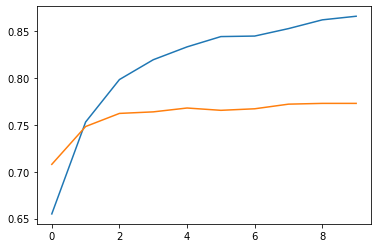

In [72]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Word Embeddings

> *Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.* -- [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding)

In [80]:
#using the embedding layer


In [81]:
#fit the model


114/114 [==============================] - 0s 3ms/step - loss: 0.5276 - acc: 0.6181


In [82]:
#plot results


### Sequential Models

In [84]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [94]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
114/114 [==============================] - 15s 136ms/step - loss: 0.5475 - acc: 0.5985
Epoch 2/10
114/114 [==============================] - 13s 117ms/step - loss: 0.5470 - acc: 0.5985
Epoch 3/10
114/114 [==============================] - 14s 125ms/step - loss: 0.5471 - acc: 0.5985
Epoch 4/10
114/114 [==============================] - 14s 119ms/step - loss: 0.5466 - acc: 0.5985
Epoch 5/10
114/114 [==============================] - 14s 125ms/step - loss: 0.5463 - acc: 0.5985
Epoch 6/10
114/114 [==============================] - 15s 136ms/step - loss: 0.5466 - acc: 0.5985
Epoch 7/10
114/114 [==============================] - 14s 126ms/step - loss: 0.5464 - acc: 0.5991
Epoch 8/10
114/114 [==============================] - 15s 128ms/step - loss: 0.5458 - acc: 0.5999
Epoch 9/10
114/114 [==============================] - 14s 124ms/step - loss: 0.5459 - acc: 0.6010
Epoch 10/10
114/114 [==============================] - 15s 135ms/step - loss: 0.5462 - acc: 0.6004
